In [ ]:
with open("megaGymDataset.csv", encoding="UTF-8") as q:
  w = q.readlines()
  for e in range (len(w)):
    w[e] = w[e].strip('\n').split(",")
w

[['',
  'Title',
  'Desc',
  'Type',
  'BodyPart',
  'Equipment',
  'Level',
  'Rating',
  'RatingDesc'],
 ['0',
  'Partner plank band row',
  'The partner plank band row is an abdominal exercise where two partners perform single-arm planks while pulling on the opposite ends of an exercise band. This technique can be done for time or reps in any ab-focused workout.',
  'Strength',
  'Abdominals',
  'Bands',
  'Intermediate',
  '0.0',
  ''],
 ['1',
  'Banded crunch isometric hold',
  '"The banded crunch isometric hold is an exercise targeting the abdominal muscles',
  ' particularly the rectus abdominis or ""six-pack"" muscles. The band adds resistance and continuous tension to this popular exercise."',
  'Strength',
  'Abdominals',
  'Bands',
  'Intermediate',
  '',
  ''],
 ['2',
  'FYR Banded Plank Jack',
  '"The banded plank jack is a variation on the plank that involves moving the legs in and out for repetitions. Having a band around the thighs forces the lower body to work harder',

In [ ]:
import pandas as pd

file_path = 'megaGymDataset.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [ ]:
q = 0
for i in range (len(df)):
  if pd.isna(df['Desc'][i]):
    q+=1
q

1550

#Preprocess


In [ ]:
df = df.drop(columns=['RatingDesc', 'Desc', 'Rating'])
df

,Unnamed: 0,Title,Type,BodyPart,Equipment,Level
0,0,Partner plank band row,Strength,Abdominals,Bands,Intermediate
1,1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate
2,2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate
3,3,Banded crunch,Strength,Abdominals,Bands,Intermediate
4,4,Crunch,Strength,Abdominals,Bands,Intermediate
...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,Strength,Triceps,E-Z Curl Bar,Intermediate
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,Strength,Triceps,E-Z Curl Bar,Beginner
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,Strength,Triceps,E-Z Curl Bar,Intermediate
2916,2916,TBS Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate


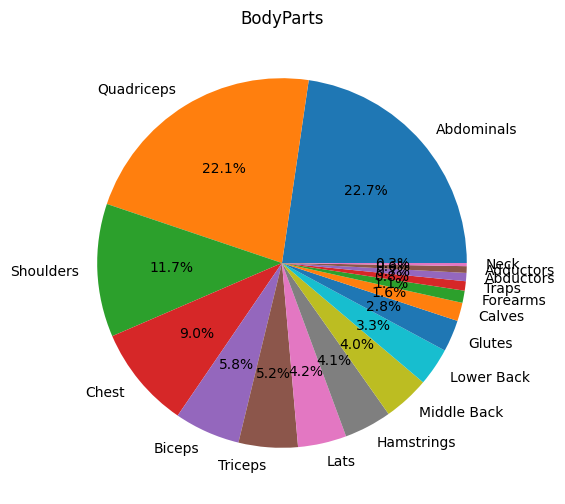

In [ ]:
e = df['BodyPart']
r = e.value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(r, labels=r.index, autopct='%1.1f%%')
plt.title('BodyParts')
plt.show()

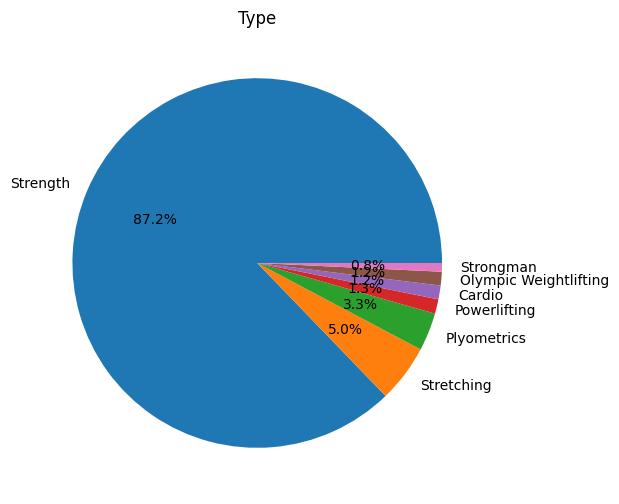

In [ ]:
e = df['Type']
r = e.value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(r, labels=r.index, autopct='%1.1f%%')
plt.title('Type')
plt.show()

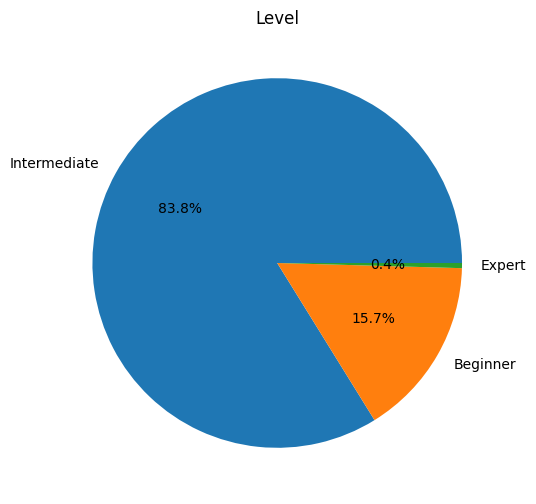

In [ ]:
e = df['Level']
r = e.value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(r, labels=r.index, autopct='%1.1f%%')
plt.title('Level')
plt.show()

Приоритетнее всего: квадрицепс, пресс, плечи. Однако, имеются несколько данных < 1%. Таким образом, модель должна выдавать неплохой результат, посколько данные распределены достаточно равномерно.

Most priority: quadriceps, abs, shoulders. However, there are few data < 1%. Thus, the model should produce a good result, since the data is distributed fairly evenly.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["BodyPart"] = le.fit_transform(df["BodyPart"])
df["Type"] = le.fit_transform(df["Type"])
df["Equipment"] = le.fit_transform(df["Equipment"])
df["Level"] = le.fit_transform(df["Level"])
df

,Unnamed: 0,Title,Type,BodyPart,Equipment,Level
0,0,Partner plank band row,4,0,0,2
1,1,Banded crunch isometric hold,4,0,0,2
2,2,FYR Banded Plank Jack,4,0,0,2
3,3,Banded crunch,4,0,0,2
4,4,Crunch,4,0,0,2
...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,4,16,5,2
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,4,16,5,0
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,4,16,5,2
2916,2916,TBS Skullcrusher,4,16,5,2


Датасет: 1. Рейтинг, 2. Выполненная тренировка (id), 3. Тип тренировки (0 - верх, 1 - низ, 2 - смешанная), 4. Цели тренировки (0 - Потеря веса, 1 - Наращивание мышечной массы, 2 - Улучшение выносливости), 5. Ограничение по здоровью (ID мышцы дается), 6. Уровень усталости (по 5-балльной шкале, где 0 - не устал, 5 - сильно устал), 7. Время выполнения всей тренировки, 8. Кол-во выполненных упражнений

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=6c71c97d1edbf422b1203576bff7a1df97d3d4a4a2332b28ed0d5967f34f91f4
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
dictmuscles = {'Nolimits':'0'}
r = 1
for w in range (len(df)):
  if df['BodyPart'][w] not in dictmuscles:
    dictmuscles[df['BodyPart'][w]]=r
    r+=1
dictmuscles


{'Nolimits': '0',
 0: 1,
 2: 2,
 1: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 15: 13,
 12: 14,
 13: 15,
 14: 16,
 16: 17}

In [ ]:
from tqdm import tqdm
import random
u = 0
o = []
for i in tqdm (range (len(df))):
  for j in range (40):
    rating = random.randint(1, 10)
    type_ = random.randint(0, 2)
    goal = random.randint(0, 2)
    healthlimit = random.randint (0, 100)
    if healthlimit > 17:
      healthlimit = 0
    tire = random.randint(0, 5)
    time = random.randint (0, 120)
    if 0<time<50:
      quant = random.randint(0, 3)
    elif 50<time<90:
      quant = random.randint (3, 6)
    else:
      quant = random.randint(6, 10)
    o.append([rating,i, type_, goal, healthlimit, tire, time, quant])
    u+=1
datasetratings = pd.DataFrame(o, columns=['Rating', 'TrainID', 'Segmentation', 'Goal', 'HealthLimit', 'Tire', 'Time', 'Quant'])
datasetratings


100%|██████████| 2918/2918 [00:01<00:00, 2349.20it/s]


,Rating,TrainID,Segmentation,Goal,HealthLimit,Tire,Time,Quant
0,10,0,1,2,0,1,1,3
1,9,0,2,1,0,5,108,9
2,10,0,1,0,0,2,69,5
3,5,0,1,2,0,5,108,7
4,6,0,2,2,13,2,63,4
...,...,...,...,...,...,...,...,...
116715,7,2917,1,1,0,4,16,1
116716,6,2917,1,2,7,3,85,6
116717,1,2917,2,1,0,0,16,0
116718,3,2917,2,1,11,2,67,6


In [ ]:
datasetratings.to_csv("datasetratings.csv", index = False)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
y = datasetratings['Rating']
x = datasetratings.drop(columns = ['Rating'])
reg = LinearRegression().fit(x, y)
reg.score(x, y)


3.1719454545164893e-05

In [ ]:
import numpy as np
reg.predict(np.array([[8, 1, 1, 0, 2, 91, 6]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.53248545])

In [ ]:
file_path = 'datasetratings.csv'
trdf = pd.read_csv(file_path)
trdf

,Rating,TrainID,Segmentation,Goal,HealthLimit,Tire,Time,Quant
0,10,0,1,2,0,1,1,3
1,9,0,2,1,0,5,108,9
2,10,0,1,0,0,2,69,5
3,5,0,1,2,0,5,108,7
4,6,0,2,2,13,2,63,4
...,...,...,...,...,...,...,...,...
116715,7,2917,1,1,0,4,16,1
116716,6,2917,1,2,7,3,85,6
116717,1,2917,2,1,0,0,16,0
116718,3,2917,2,1,11,2,67,6


In [ ]:
megagym = {}
for index, row in df.iterrows():
  id = row['Unnamed: 0']
  type_ = row['Type']
  bpart = row['BodyPart']
  eqp = row['Equipment']
  lvl = row['Level']
  megagym[id] = np.array ([type_, bpart + 1, eqp, lvl])
megagym


{0: array([4, 1, 0, 2]),
 1: array([4, 1, 0, 2]),
 2: array([4, 1, 0, 2]),
 3: array([4, 1, 0, 2]),
 4: array([4, 1, 0, 2]),
 5: array([4, 1, 0, 2]),
 6: array([4, 1, 0, 2]),
 7: array([4, 1, 0, 2]),
 8: array([4, 1, 1, 2]),
 9: array([4, 1, 1, 2]),
 10: array([4, 1, 1, 2]),
 11: array([4, 1, 1, 0]),
 12: array([4, 1, 1, 0]),
 13: array([4, 1, 1, 2]),
 14: array([4, 1, 1, 2]),
 15: array([4, 1, 1, 2]),
 16: array([4, 1, 1, 2]),
 17: array([4, 1, 1, 2]),
 18: array([4, 1, 1, 2]),
 19: array([4, 1, 1, 2]),
 20: array([4, 1, 8, 0]),
 21: array([4, 1, 8, 2]),
 22: array([4, 1, 8, 0]),
 23: array([4, 1, 8, 2]),
 24: array([4, 1, 8, 2]),
 25: array([4, 1, 8, 2]),
 26: array([4, 1, 8, 2]),
 27: array([4, 1, 8, 2]),
 28: array([4, 1, 8, 2]),
 29: array([4, 1, 8, 2]),
 30: array([4, 1, 8, 2]),
 31: array([4, 1, 8, 2]),
 32: array([4, 1, 8, 2]),
 33: array([4, 1, 8, 2]),
 34: array([4, 1, 8, 2]),
 35: array([4, 1, 8, 2]),
 36: array([4, 1, 8, 2]),
 37: array([4, 1, 8, 2]),
 38: array([4, 1, 8, 2

In [ ]:
spis = []
for index, row in trdf.iterrows():
  spis.append(megagym[row['TrainID']])
spis
datasetratingss = pd.DataFrame(spis, columns=['Type','BodyPart', 'Equipment', 'Level'])
datasetratingss

,Type,BodyPart,Equipment,Level
0,4,1,0,2
1,4,1,0,2
2,4,1,0,2
3,4,1,0,2
4,4,1,0,2
...,...,...,...,...
116715,4,17,5,2
116716,4,17,5,2
116717,4,17,5,2
116718,4,17,5,2


In [ ]:
spi = []
for index, row in tqdm(datasetratings.iterrows(), total = len(datasetratings)):
  result = pd.concat([row, datasetratingss.iloc[index]],axis = 0)
  # print(row, datasetratingss.iloc[index], result)
  # break
  spi.append(result)
datasetratingsend = pd.DataFrame(spi, columns=['Rating', 'TrainID', 'Segmentation', 'Goal', 'HealthLimit', 'Tire', 'Time', 'Quant', 'Type','BodyPart', 'Equipment', 'Level'])
datasetratingsend

100%|██████████| 116720/116720 [01:03<00:00, 1826.85it/s]


,Rating,TrainID,Segmentation,Goal,HealthLimit,Tire,Time,Quant,Type,BodyPart,Equipment,Level
0,10,0,1,2,0,1,1,3,4,1,0,2
1,9,0,2,1,0,5,108,9,4,1,0,2
2,10,0,1,0,0,2,69,5,4,1,0,2
3,5,0,1,2,0,5,108,7,4,1,0,2
4,6,0,2,2,13,2,63,4,4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
116715,7,2917,1,1,0,4,16,1,4,17,5,2
116716,6,2917,1,2,7,3,85,6,4,17,5,2
116717,1,2917,2,1,0,0,16,0,4,17,5,2
116718,3,2917,2,1,11,2,67,6,4,17,5,2


In [ ]:
datasetratingsend.to_csv("mydataset.csv", index=False)

In [ ]:
datasetratingsend = datasetratingsend.drop (['Time','TrainID', 'Tire', 'Goal', 'HealthLimit', 'Level'], axis = 1)
datasetratingsend

,Rating,Segmentation,Quant,Type,BodyPart,Equipment
0,10,1,3,4,1,0
1,9,2,9,4,1,0
2,10,1,5,4,1,0
3,5,1,7,4,1,0
4,6,2,4,4,1,0
...,...,...,...,...,...,...
116715,7,1,1,4,17,5
116716,6,1,6,4,17,5
116717,1,2,0,4,17,5
116718,3,2,6,4,17,5


In [ ]:
datasetratingsend.to_csv("datasetratingsend.csv", index = False)

#Training Model


In [ ]:
y = datasetratingsend['Rating']
X = datasetratingsend.drop(columns = ['Rating'])
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X_train, y_train)
# reg.score(X_test, y_test)

In [ ]:
# import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
# for f in range (1, 5):
#   poly = PolynomialFeatures(f)
#   x_poly = poly.fit_transform(X_train)
#   X_test_poly = poly.fit_transform(X_test)
#   reg = LinearRegression().fit(x_poly, y_train)
#   y_pred = reg.predict(X_test_poly)
#   mae = mean_absolute_error(y_test, y_pred)
#   print (f, mae)


In [ ]:
# from sklearn import linear_model
# f = 0.1
# while f<0.7:
#   clf = linear_model.Lasso(f)
#   clf.fit(X_train, y_train)
#   y_pred = clf.predict(X_test)
#   mae = mean_absolute_error(y_test, y_pred)
#   f+=0.1
#   print(mae)


In [ ]:
# from sklearn import linear_model
# f = 0.1
# while f<0.7:
#   clf = linear_model.Lasso(f)
#   clf.fit(X_train, y_train)
#   y_pred = clf.predict(X_test)
#   mae = mean_absolute_error(y_test, y_pred)
#   f+=0.1
#   print(mae)

In [ ]:
from sklearn.linear_model import Ridge
alpha = 0.1
while round (alpha, 2) != 1:
  clf = Ridge(alpha)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  alpha += 0.1
  print (alpha, mae)

0.2 2.4869992781078882
0.30000000000000004 2.486999278122354
0.4 2.486999278136819
0.5 2.486999278151284
0.6 2.4869992781657495
0.7 2.486999278180215
0.7999999999999999 2.4869992781946797
0.8999999999999999 2.486999278209144
0.9999999999999999 2.486999278223609


In [ ]:
import random
input_data = [[random.randint(0, 2), random.randint(1, 7), random.randint(1, 4), random.randint(1, 17), random.randint(0, 5)]]
clf.predict(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([5.52012829])

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor()
# regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mae




In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

2.5481104464286264

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regr = SVR(C=1.0, epsilon=0.2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

2.4864885605122136

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

2.486448163544805

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)
mae = mean_absolute_error (y_test, mlp.predict(X_test_scaled))
mae

2.485741389463936

In [ ]:
from joblib import dump
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X, y)
dump(ridge_model, 'ridge_model.joblib')

['ridge_model.joblib']